In [1]:
from datetime import timedelta
import datetime
import time

import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
# %matplotlib qt

import seaborn as sns

import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Import dataset

In [2]:
turbine = 'T06'
path_dataset = f'../dataset/df_turbine_{turbine}.json'

## dataset

In [3]:
df = pd.read_json(path_dataset)
df.set_index('timestamp', inplace=True)
df.sort_index(ascending=True,inplace=True)
df.head()

turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2016-01-01 00:00:00        T06             -17.8       1248.5   
2016-01-01 00:10:00        T06             -32.1       1154.1   
2016-01-01 00:20:00        T06             -28.6       1041.4   
2016-01-01 00:30:00        T06             -52.5       1252.5   
2016-01-01 00:40:00        T06             117.2       1257.6   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2016-01-01 00:00:00                  0.9              62.5   
2016-01-01 00:10:00                 49.6               8.9   
2016-01-01 00:20:00                 45.2               4.0   
2016-01-01 00:30:00                  0.8             100.3   
2016-01-01 00:40:00                 -0.3             196.6   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                201.5               42.0   
2016-01-01 00:10:00                219.1               42.0   
2016-01-01 00:20:00                221.2               42.0   
2016-01-01 00:30:00                216.8               42.0   
2016-01-01 00:40:00                197.6               41.0   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2016-01-01 00:00:00                1.6                    0.1   
2016-01-01 00:10:00                1.3                   16.4   
2016-01-01 00:20:00                0.7                   22.0   
2016-01-01 00:30:00                1.7                    1.2   
2016-01-01 00:40:00                2.4                  -92.7   

                     grd_prod_curphse1_avg  ...  grd_prod_voltphse1_avg  \
timestamp                                   ...                           
2016-01-01 00:00:00                   78.8  ...                   400.7   
2016-01-01 00:10:00                   31.9  ...                   401.1   
2016-01-01 00:20:00                   29.2  ...                   399.9   
2016-01-01 00:30:00                  107.7  ...                   399.2   
2016-01-01 00:40:00                  169.7  ...                   398.6   

                     grd_prod_psblepwr_std  grd_prod_cosphi_avg  \
timestamp                                                         
2016-01-01 00:00:00                   36.7                  0.6   
2016-01-01 00:10:00                   44.7                  0.7   
2016-01-01 00:20:00                   30.5                  0.7   
2016-01-01 00:30:00                   48.5                  0.7   
2016-01-01 00:40:00                   52.4                  0.9   

                     prod_latestavg_actpwrgen0  prod_latestavg_actpwrgen1  \
timestamp                                                                   
2016-01-01 00:00:00                        0.0                    10465.0   
2016-01-01 00:10:00                     -734.0                     2295.0   
2016-01-01 00:20:00                    -1173.0                     1836.0   
2016-01-01 00:30:00                        0.0                    16630.0   
2016-01-01 00:40:00                        0.0                    32733.0   

                     prod_latestavg_actpwrgen2  rtr_rpm_std  component  \
timestamp                                                                
2016-01-01 00:00:00                        0.0          0.1       None   
2016-01-01 00:10:00                        0.0          2.4       None   
2016-01-01 00:20:00                        0.0          3.4       None   
2016-01-01 00:30:00                        0.0          0.1       None   
2016-01-01 00:40:00                        0.0          0.1       None   

                     remarks  failure  
timestamp                              
2016-01-01 00:00:00     None        0  
2016-01-01 00:10:00     None        0  
2016-01-01 00:20

## check number of failures

In [4]:
df.loc[~df['component'].isnull(),['turbine_id','component', 'remarks','failure']]


turbine_id        component  \
timestamp                                         
2016-04-04 18:53:00        T06  HYDRAULIC_GROUP   
2016-07-11 19:48:00        T06        GENERATOR   
2016-07-24 17:01:00        T06        GENERATOR   
2016-09-04 08:08:00        T06        GENERATOR   
2016-10-02 17:08:00        T06        GENERATOR   
2016-10-27 16:26:00        T06        GENERATOR   
2017-08-19 09:47:00        T06  HYDRAULIC_GROUP   

                                                               remarks  \
timestamp                                                                
2016-04-04 18:53:00                          Error in pitch regulation   
2016-07-11 19:48:00                                 Generator replaced   
2016-07-24 17:01:00               Generator temperature sensor failure   
2016-09-04 08:08:00                   High temperature generator error   
2016-10-02 17:08:00  Refrigeration system and temperature sensors i...   
2016-10-27 16:26:00                                 Generator replaced   
2017-08-19 09:47:00                                 Oil leakage in Hub   

                     failure  
timestamp                     
2016-04-04 18:53:00        1  
2016-07-11 19:48:00        1  
2016-07-24 17:01:00        1  
2016-09-04 08:08:00        1  
2016-10-02 17:08:00        1  
2016-10-27 16:26:00        1  
2017-08-19 09:47:00        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85395 entries, 2016-01-01 00:00:00 to 2017-09-01 00:00:00
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   turbine_id                   85395 non-null  object 
 1   grd_prod_pwr_min             85388 non-null  float64
 2   gen_rpm_avg                  85388 non-null  float64
 3   blds_pitchangle_max          85388 non-null  float64
 4   grd_prod_pwr_avg             85388 non-null  float64
 5   amb_winddir_abs_avg          85388 non-null  float64
 6   gen_bear_temp_avg            85387 non-null  float64
 7   amb_windspeed_min            85388 non-null  float64
 8   grd_prod_reactpwr_max        85388 non-null  float64
 9   grd_prod_curphse1_avg        85388 non-null  float64
 10  grd_prod_pwr_max             85388 non-null  float64
 11  grd_prod_pwr_std             85388 non-null  float64
 12  blds_pitchangle_min          85388 non-

In [6]:
datatypes = pd.DataFrame(df.dtypes, columns=['dtypes'])
datatypes['dtypes'].value_counts()

float64    81
object      3
int64       1
Name: dtypes, dtype: int64

In [7]:
datatypes[datatypes['dtypes'] == 'int64']

dtypes
failure  int64

There is only 3 columns as string

In [8]:
tags_float = datatypes[datatypes['dtypes'] == 'float'].index.tolist()
tags_str = datatypes[datatypes['dtypes'] == 'object'].index.tolist()
tags_int = datatypes[datatypes['dtypes'] == 'int64'].index.tolist()


## Check Duplicates

In [9]:
df[df.index.duplicated(keep=False)]

turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2016-10-30 02:00:00        T06             -20.9         33.0   
2016-10-30 02:00:00        T06             -21.1         29.9   
2016-10-30 02:10:00        T06             -21.1         27.3   
2016-10-30 02:10:00        T06             -21.0         31.6   
2016-10-30 02:20:00        T06             -21.1         32.1   
2016-10-30 02:20:00        T06             -20.9         30.4   
2016-10-30 02:30:00        T06             -21.1         27.4   
2016-10-30 02:30:00        T06             -21.1         32.6   
2016-10-30 02:40:00        T06             -21.0         30.8   
2016-10-30 02:40:00        T06             -24.9         27.6   
2016-10-30 02:50:00        T06             -21.2         28.5   
2016-10-30 02:50:00        T06             -21.3         30.1   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2016-10-30 02:00:00                 89.7              -1.8   
2016-10-30 02:00:00                 89.7              -2.2   
2016-10-30 02:10:00                 89.7              -2.1   
2016-10-30 02:10:00                 89.7              -1.9   
2016-10-30 02:20:00                 89.7              -1.8   
2016-10-30 02:20:00                 89.7              -2.2   
2016-10-30 02:30:00                 89.7              -1.9   
2016-10-30 02:30:00                 89.7              -2.1   
2016-10-30 02:40:00                 89.7              -2.0   
2016-10-30 02:40:00                 89.7              -2.1   
2016-10-30 02:50:00                 89.7              -2.2   
2016-10-30 02:50:00                 89.7              -2.2   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2016-10-30 02:00:00                 96.9               25.0   
2016-10-30 02:00:00                 81.8               25.0   
2016-10-30 02:10:00                 92.2               25.0   
2016-10-30 02:10:00                102.3               25.0   
2016-10-30 02:20:00                 97.6               25.0   
2016-10-30 02:20:00                121.3               25.0   
2016-10-30 02:30:00                 82.7               25.0   
2016-10-30 02:30:00                112.1               25.0   
2016-10-30 02:40:00                114.5               25.0   
2016-10-30 02:40:00                106.1               25.0   
2016-10-30 02:50:00                 99.1               25.0   
2016-10-30 02:50:00                107.7               25.0   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2016-10-30 02:00:00                4.9                   -3.0   
2016-10-30 02:00:00                5.2                   -3.0   
2016-10-30 02:10:00                4.5                   -3.0   
2016-10-30 02:10:00                6.5                   -3.0   
2016-10-30 02:20:00                6.0                   -3.0   
2016-10-30 02:20:00                3.9                   -3.1   
2016-10-30 02:30:00                5.2                   -3.0   
2016-10-30 02:30:00                6.2                   -3.0   
2016-10-30 02:40:00                6.0                   -3.1   
2016-10-30 02:40:00                5.6                   -3.0   
2016-10-30 02:50:00                5.3                   -3.1   
2016-10-30 02:50:00                4.2                   -3.0   

                     grd_prod_curphse1_avg  ...  grd_prod_voltphse1_avg  \
timestamp                                   ...                           
2016-10-30 02:00:00                    1.5  ...                   402.2   
2016-10-30 02:00:00                    2.1  ...                   400.3   
2016-10-30 02:10:00                    2.0  ...                   400.8   
2016-10-30 02:10:00                    1.6  ...                   400.0

In [10]:
print(f'before {df.shape}')
df = df[~df.index.duplicated(keep='first')]
print(f'after {df.shape}')


before (85395, 85)
after (85389, 85)


## Splitting Training and Test Set

In [11]:
training_set = df.loc['2016-01-01':'2016-12-31'].copy()
test_set =  df.loc['2017-01-01':'2017-12-31'].copy()

# Analyse Training Set

There is many many columns to analyse, so in order to make it simple and reduce the dataset 

# Numerical Variables

## Check for Missing Data

In [12]:
pct_null = df.isnull().sum() /df.shape[0]
pct_null.sort_values(ascending=False)


component                  0.999918
remarks                    0.999918
gen_bear_temp_avg          0.000094
grd_prod_cosphi_avg        0.000094
rtr_rpm_std                0.000082
                             ...   
grd_busbar_temp_avg        0.000082
grd_prod_psblepwr_min      0.000082
hvtrafo_phase2_temp_avg    0.000082
turbine_id                 0.000000
failure                    0.000000
Length: 85, dtype: float64

The columns don't have high percentage of null data

## Check for Inf values

In [13]:
# check for infinite values
d = ~np.isfinite(training_set[tags_float])
d.sum()

grd_prod_pwr_min             6
gen_rpm_avg                  6
blds_pitchangle_max          6
grd_prod_pwr_avg             6
amb_winddir_abs_avg          6
                            ..
grd_prod_cosphi_avg          6
prod_latestavg_actpwrgen0    6
prod_latestavg_actpwrgen1    6
prod_latestavg_actpwrgen2    6
rtr_rpm_std                  6
Length: 81, dtype: int64

In [14]:
# replace inf values
training_set[tags_float] = training_set[tags_float].replace([np.inf, -np.inf], np.nan)

## Fillna

In [15]:
# fillna
training_set[tags_float] = training_set[tags_float].fillna(method='backfill')

In [16]:
pct_null = training_set[tags_float].isnull().sum() /training_set[tags_float].shape[0]
pct_null.sort_values(ascending=False)


grd_prod_pwr_min          0.0
nac_temp_avg              0.0
gen_bear2_temp_avg        0.0
gen_rpm_max               0.0
amb_windspeed_est_avg     0.0
                         ... 
amb_windspeed_avg         0.0
grd_prod_voltphse3_avg    0.0
grd_busbar_temp_avg       0.0
grd_prod_psblepwr_min     0.0
rtr_rpm_std               0.0
Length: 81, dtype: float64

In [17]:
training_set_float = training_set[tags_float].copy()

## Check for tags with high correlation and drop one of them - VIF

In [18]:
vif_saved = True

if vif_saved == True:
    pass
else:
    print(f'Started at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    start_time = time.time()

    # Scaling first to ease the calculations
    scaler = StandardScaler()

    X = training_set_float.copy()
    X_scaled = scaler.fit_transform(X)

    # Keep DataFrame indexes ---------------------------------------------------------
    X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns, index=X.index)

    vif_factor_threshold = 5
    iter = 1
    span_tags_to_remove = 1

    while iter > 0:
        print(f'\r{len(X_scaled.columns)}', end="")

        vif = pd.DataFrame()
        vif["features"] = X_scaled.columns
        vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
        vif_high = vif.sort_values(by=['VIF Factor'], ascending=False)

        if vif_high[vif_high['VIF Factor'] > vif_factor_threshold].shape[0] == 0:
            iter = 0
        else:
            tag_name = vif_high[vif_high['VIF Factor'] > vif_factor_threshold].iloc[:span_tags_to_remove]['features']
            cols = X_scaled.columns.tolist()
            for t in tag_name:
                cols.remove(t)
            X_scaled = X_scaled[cols].copy()

    execution = "--- %s minutes ---" + str(round((time.time() - start_time)/60,2))
    print(f'Ended at --- {str(datetime.datetime.now() - timedelta(hours=3))}')
    print(f'duration: {execution}')

    display(vif_high)

Started at --- 2021-11-10 17:28:00.646477
81

C:\Users\rhamacherhay\Anaconda3\envs\hamacher_env\lib\site-packages\statsmodels\regression\linear_model.py:1740: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


21Ended at --- 2021-11-10 18:07:20.965134
duration: --- %s minutes ---39.34


features  VIF Factor
6             amb_windspeed_std    3.779035
5         grd_prod_psblecap_min    3.617378
14             hyd_oil_temp_avg    3.005909
1             amb_windspeed_min    2.939931
2         grd_prod_reactpwr_max    2.802124
11            nac_direction_avg    2.709948
0           amb_winddir_abs_avg    2.624769
3           blds_pitchangle_min    2.539815
7         grd_prod_reactpwr_min    2.429558
19          grd_prod_cosphi_avg    2.407995
9         grd_prod_psbleind_std    2.366531
8             cont_hub_temp_avg    2.203929
12           gen_bear2_temp_avg    2.174651
15  prod_latestavg_reactpwrgen0    2.083347
18        grd_prod_psblepwr_std    1.932950
13       grd_prod_voltphse2_avg    1.664585
17          blds_pitchangle_std    1.629995
16            grd_prod_freq_avg    1.609497
4      amb_winddir_relative_avg    1.006655
10  prod_latestavg_reactpwrgen2         NaN
20    prod_latestavg_actpwrgen2         NaN

In [22]:
# vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
# vif_high.to_json(vif_filename)

In [23]:
vif_filename = f'../output_EDA/{turbine}/vif_high_{turbine}.json'
vif_high = pd.read_json(vif_filename)
vif_high

features  VIF Factor
6             amb_windspeed_std    3.779035
5         grd_prod_psblecap_min    3.617378
14             hyd_oil_temp_avg    3.005909
1             amb_windspeed_min    2.939931
2         grd_prod_reactpwr_max    2.802124
11            nac_direction_avg    2.709948
0           amb_winddir_abs_avg    2.624769
3           blds_pitchangle_min    2.539815
7         grd_prod_reactpwr_min    2.429558
19          grd_prod_cosphi_avg    2.407995
9         grd_prod_psbleind_std    2.366531
8             cont_hub_temp_avg    2.203929
12           gen_bear2_temp_avg    2.174651
15  prod_latestavg_reactpwrgen0    2.083347
18        grd_prod_psblepwr_std    1.932950
13       grd_prod_voltphse2_avg    1.664585
17          blds_pitchangle_std    1.629995
16            grd_prod_freq_avg    1.609497
4      amb_winddir_relative_avg    1.006655
10  prod_latestavg_reactpwrgen2         NaN
20    prod_latestavg_actpwrgen2         NaN

In [24]:
print(f'Frmo 80 columns noe we have {vif_high.shape[0]}')

tags_float_red = vif_high['features'].values
training_set_float_red = training_set_float[tags_float_red]
training_set_float_red

Frmo 80 columns noe we have 21


amb_windspeed_std  grd_prod_psblecap_min  \
timestamp                                                       
2016-01-01 00:00:00                0.6                    0.0   
2016-01-01 00:10:00                0.7                    0.0   
2016-01-01 00:20:00                0.7                    0.0   
2016-01-01 00:30:00                0.8                    0.0   
2016-01-01 00:40:00                0.7                  556.0   
...                                ...                    ...   
2016-12-31 23:10:00                0.7                  820.3   
2016-12-31 23:20:00                0.8                  684.7   
2016-12-31 23:30:00                0.7                  922.4   
2016-12-31 23:40:00                0.8                  785.2   
2016-12-31 23:50:00                0.8                  664.4   

                     hyd_oil_temp_avg  amb_windspeed_min  \
timestamp                                                  
2016-01-01 00:00:00              30.0                1.6   
2016-01-01 00:10:00              30.0                1.3   
2016-01-01 00:20:00              31.0                0.7   
2016-01-01 00:30:00              31.0                1.7   
2016-01-01 00:40:00              31.0                2.4   
...                               ...                ...   
2016-12-31 23:10:00              29.0                2.3   
2016-12-31 23:20:00              29.0                1.9   
2016-12-31 23:30:00              29.0                2.6   
2016-12-31 23:40:00              29.0                2.5   
2016-12-31 23:50:00              28.0                2.4   

                     grd_prod_reactpwr_max  nac_direction_avg  \
timestamp                                                       
2016-01-01 00:00:00                    0.1              204.6   
2016-01-01 00:10:00                   16.4              210.5   
2016-01-01 00:20:00                   22.0              199.0   
2016-01-01 00:30:00                    1.2              205.6   
2016-01-01 00:40:00                  -92.7              207.4   
...                                    ...                ...   
2016-12-31 23:10:00                 -109.8               92.8   
2016-12-31 23:20:00                 -114.8               92.7   
2016-12-31 23:30:00                 -106.3               85.0   
2016-12-31 23:40:00                 -103.9               85.0   
2016-12-31 23:50:00                 -112.9               90.0   

                     amb_winddir_abs_avg  blds_pitchangle_min  \
timestamp                                                       
2016-01-01 00:00:00                201.5                 -1.1   
2016-01-01 00:10:00                219.1                 -2.3   
2016-01-01 00:20:00                221.2                 -2.3   
2016-01-01 00:30:00                216.8                 -1.8   
2016-01-01 00:40:00                197.6                 -2.0   
...                                  ...                  ...   
2016-12-31 23:10:00                 86.6                 -2.2   
2016-12-31 23:20:00                 88.7                 -2.2   
2016-12-31 23:30:00                 81.6                 -2.0   
2016-12-31 23:40:00                 83.8                 -2.3   
2016-12-31 23:50:00                 90.4                 -2.2   

                     grd_prod_reactpwr_min  grd_prod_cosphi_avg  ...  \
timestamp                                                        ...   
2016-01-01 00:00:00                  -94.0                  0.6  ...   
2016-01-01 00:10:00                  -94.9                  0.7  ...   
2016-01-01 00:20:00                 -100.0                  0.7  ...   
2016-01-01 00:30:00                 -104.9                  0.7  ...   
2016-01-01 00:40:00                 -106.1                  0.9  ...   
...                                    ...                  ...  ...   
2016-12-31 23:10:00                 -126.5                  0.9  ...   
2016-12-31 23:20:00                 -131.2            

### Check for low variance 

In [25]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
x = training_set_float_red.std(numeric_only=True).sort_values(ascending=True)
display(x)

tags_float_drop = x[x<=1].index
print('************* DROPPED TAGS *************')
display(tags_float_drop)

tags_float_red = x[x>1].index
training_set_float_red = training_set_float_red[tags_float_red]
print(training_set_float_red.shape)
training_set_float_red


prod_latestavg_actpwrgen2       0.000
prod_latestavg_reactpwrgen2     0.000
grd_prod_cosphi_avg             0.172
grd_prod_freq_avg               0.223
amb_windspeed_std               0.672
amb_windspeed_min               1.312
grd_prod_voltphse2_avg          3.010
blds_pitchangle_std             4.162
cont_hub_temp_avg               5.335
hyd_oil_temp_avg                6.095
gen_bear2_temp_avg             14.348
blds_pitchangle_min            18.110
amb_winddir_relative_avg       34.255
grd_prod_psbleind_std          95.197
amb_winddir_abs_avg            95.286
nac_direction_avg              95.636
grd_prod_psblepwr_std         100.096
grd_prod_reactpwr_min         126.496
grd_prod_reactpwr_max         208.840
grd_prod_psblecap_min         356.079
prod_latestavg_reactpwrgen0   578.437
dtype: float64

************* DROPPED TAGS *************


Index(['prod_latestavg_actpwrgen2', 'prod_latestavg_reactpwrgen2',
       'grd_prod_cosphi_avg', 'grd_prod_freq_avg', 'amb_windspeed_std'],
      dtype='object')

(50575, 16)


amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                        
2016-01-01 00:00:00              1.600                 398.500   
2016-01-01 00:10:00              1.300                 399.500   
2016-01-01 00:20:00              0.700                 398.700   
2016-01-01 00:30:00              1.700                 397.200   
2016-01-01 00:40:00              2.400                 396.700   
...                                ...                     ...   
2016-12-31 23:10:00              2.300                 395.000   
2016-12-31 23:20:00              1.900                 394.800   
2016-12-31 23:30:00              2.600                 395.500   
2016-12-31 23:40:00              2.500                 395.800   
2016-12-31 23:50:00              2.400                 396.000   

                     blds_pitchangle_std  cont_hub_temp_avg  hyd_oil_temp_avg  \
timestamp                                                                       
2016-01-01 00:00:00                0.500             28.000            30.000   
2016-01-01 00:10:00                8.900             28.000            30.000   
2016-01-01 00:20:00               10.000             27.000            31.000   
2016-01-01 00:30:00                0.600             27.000            31.000   
2016-01-01 00:40:00                0.300             27.000            31.000   
...                                  ...                ...               ...   
2016-12-31 23:10:00                0.400             22.000            29.000   
2016-12-31 23:20:00                0.400             22.000            29.000   
2016-12-31 23:30:00                0.300             22.000            29.000   
2016-12-31 23:40:00                0.400             22.000            29.000   
2016-12-31 23:50:00                0.400             22.000            28.000   

                     gen_bear2_temp_avg  blds_pitchangle_min  \
timestamp                                                      
2016-01-01 00:00:00              35.000               -1.100   
2016-01-01 00:10:00              35.000               -2.300   
2016-01-01 00:20:00              35.000               -2.300   
2016-01-01 00:30:00              35.000               -1.800   
2016-01-01 00:40:00              35.000               -2.000   
...                                 ...                  ...   
2016-12-31 23:10:00              38.000               -2.200   
2016-12-31 23:20:00              37.000               -2.200   
2016-12-31 23:30:00              36.000               -2.000   
2016-12-31 23:40:00              35.000               -2.300   
2016-12-31 23:50:00              34.000               -2.200   

                     amb_winddir_relative_avg  grd_prod_psbleind_std  \
timestamp                                                              
2016-01-01 00:00:00                    -3.100                180.000   
2016-01-01 00:10:00                     8.600                154.100   
2016-01-01 00:20:00                    22.200                115.800   
2016-01-01 00:30:00                    11.100                237.500   
2016-01-01 00:40:00                    -9.800                150.900   
...                                       ...                    ...   
2016-12-31 23:10:00                    -6.200                 27.400   
2016-12-31 23:20:00                    -4.000                 75.000   
2016-12-31 23:30:00                    -3.400                 11.000   
2016-12-31 23:40:00                    -1.200                 36.000   
2016-12-31 23:50:00                     0.400                 58.000   

                     amb_winddir_abs_avg  nac_direction_avg  \
timestamp                                                     
2016-01-01 00:00:00              201.500            204.600   
2016-01-01 00:10:00              219.100            210.500   
2016-01-01 00:20:00              221.200            199.000   
2016-01-01 00:30:00    

### Check Different Types of Correlations

In [26]:
# Correlation

def plot_corr(df, method='pearson', additional_filename = '' ):
    corr = df.corr(method=method)
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
    ax.set_title(f'{method}')
    filename = f'correlation_heatmap_{method}_{additional_filename}.png'
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
    plt.close(f)
    print(f' ok {filename}')
    
plot_corr(training_set_float_red, 'pearson', '1')
plot_corr(training_set_float_red, 'spearman', '1')


 ok correlation_heatmap_pearson_1.png
 ok correlation_heatmap_spearman_1.png


In [27]:
filename = f'correlation_pairplot.png'
sns.pairplot(training_set_float_red, corner=True)
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print('ok')


ok


In [28]:
profile = ProfileReport(training_set_float_red, title="Pandas Profiling Report", explorative=True)
profile.to_file(f'../output_EDA/{turbine}/{turbine}_pandas_profiling_training.html')
print('ok')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

ok


### Drop high correlated variables

In [29]:


df_float_red = training_set_float_red.copy()

print(f'before {df_float_red.shape}')
names = ['not empty']

corr = df_float_red.corr(method='spearman')
names = []
corr
    
loop = corr.iteritems()

for name, values in loop:
    print(name)
    high_corr = values[values.abs() > 0.7]
    cols = high_corr.index.tolist()
    cols.remove(name)
    
    if cols != []:
        print(cols)
        for col in cols:
            if (name in df_float_red.columns.tolist()) & (col in df_float_red.columns.tolist()):
                print(df_float_red.columns.shape) 
                print(f'***** drop {col} *****')
                df_float_red = df_float_red.drop(columns=col)
                print(df_float_red.columns.shape) 
    # if names != []:
    #     corr_sum = corr.abs().sum(axis=0)
    #     high_corr_sum = corr_sum[names]
    #     drop_col = high_corr_sum[high_corr_sum==high_corr_sum.max()].index

    #     df_float_red = df_float_red.drop(columns=drop_col)


print(f'after {df_float_red.shape}')


before (50575, 16)
amb_windspeed_min
['grd_prod_reactpwr_max']
(16,)
***** drop grd_prod_reactpwr_max *****
(15,)
grd_prod_voltphse2_avg
blds_pitchangle_std
['grd_prod_psbleind_std']
(15,)
***** drop grd_prod_psbleind_std *****
(14,)
cont_hub_temp_avg
['hyd_oil_temp_avg']
(14,)
***** drop hyd_oil_temp_avg *****
(13,)
hyd_oil_temp_avg
['cont_hub_temp_avg']
gen_bear2_temp_avg
['grd_prod_reactpwr_max']
blds_pitchangle_min
['grd_prod_psblepwr_std', 'grd_prod_psblecap_min']
(13,)
***** drop grd_prod_psblepwr_std *****
(12,)
(12,)
***** drop grd_prod_psblecap_min *****
(11,)
amb_winddir_relative_avg
grd_prod_psbleind_std
['blds_pitchangle_std']
amb_winddir_abs_avg
['nac_direction_avg']
(11,)
***** drop nac_direction_avg *****
(10,)
nac_direction_avg
['amb_winddir_abs_avg']
grd_prod_psblepwr_std
['blds_pitchangle_min']
grd_prod_reactpwr_min
grd_prod_reactpwr_max
['amb_windspeed_min', 'gen_bear2_temp_avg', 'grd_prod_psblecap_min']
grd_prod_psblecap_min
['blds_pitchangle_min', 'grd_prod_reactpw

In [30]:
training_set_float_red = df_float_red.copy()
training_set_float_red

amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                        
2016-01-01 00:00:00              1.600                 398.500   
2016-01-01 00:10:00              1.300                 399.500   
2016-01-01 00:20:00              0.700                 398.700   
2016-01-01 00:30:00              1.700                 397.200   
2016-01-01 00:40:00              2.400                 396.700   
...                                ...                     ...   
2016-12-31 23:10:00              2.300                 395.000   
2016-12-31 23:20:00              1.900                 394.800   
2016-12-31 23:30:00              2.600                 395.500   
2016-12-31 23:40:00              2.500                 395.800   
2016-12-31 23:50:00              2.400                 396.000   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.500             28.000   
2016-01-01 00:10:00                8.900             28.000   
2016-01-01 00:20:00               10.000             27.000   
2016-01-01 00:30:00                0.600             27.000   
2016-01-01 00:40:00                0.300             27.000   
...                                  ...                ...   
2016-12-31 23:10:00                0.400             22.000   
2016-12-31 23:20:00                0.400             22.000   
2016-12-31 23:30:00                0.300             22.000   
2016-12-31 23:40:00                0.400             22.000   
2016-12-31 23:50:00                0.400             22.000   

                     gen_bear2_temp_avg  blds_pitchangle_min  \
timestamp                                                      
2016-01-01 00:00:00              35.000               -1.100   
2016-01-01 00:10:00              35.000               -2.300   
2016-01-01 00:20:00              35.000               -2.300   
2016-01-01 00:30:00              35.000               -1.800   
2016-01-01 00:40:00              35.000               -2.000   
...                                 ...                  ...   
2016-12-31 23:10:00              38.000               -2.200   
2016-12-31 23:20:00              37.000               -2.200   
2016-12-31 23:30:00              36.000               -2.000   
2016-12-31 23:40:00              35.000               -2.300   
2016-12-31 23:50:00              34.000               -2.200   

                     amb_winddir_relative_avg  amb_winddir_abs_avg  \
timestamp                                                            
2016-01-01 00:00:00                    -3.100              201.500   
2016-01-01 00:10:00                     8.600              219.100   
2016-01-01 00:20:00                    22.200              221.200   
2016-01-01 00:30:00                    11.100              216.800   
2016-01-01 00:40:00                    -9.800              197.600   
...                                       ...                  ...   
2016-12-31 23:10:00                    -6.200               86.600   
2016-12-31 23:20:00                    -4.000               88.700   
2016-12-31 23:30:00                    -3.400               81.600   
2016-12-31 23:40:00                    -1.200               83.800   
2016-12-31 23:50:00                     0.400               90.400   

                     grd_prod_reactpwr_min  prod_latestavg_reactpwrgen0  
timestamp                                                                
2016-01-01 00:00:00                -94.000                        0.000  
2016-01-01 00:10:00                -94.900                     -698.000  
2016-01-01 00:20:00               -100.000                     -712.000  
2016-01-01 00:30:00               -104.900                        0.000  
2016-01-01 00:40:00               -106.100                        0.000  
...                                    ...                          ...  
2016-1

In [31]:
# Correlation
    
plot_corr(training_set_float_red, 'pearson', '2')
plot_corr(training_set_float_red, 'spearman', '2')

 ok correlation_heatmap_pearson_2.png
 ok correlation_heatmap_spearman_2.png


## Temporal Analyses

In [32]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses.png'

plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
for e,tag in enumerate(training_set_float_red.columns):
    tmp = training_set_float_red[tag].copy()
    
    plt.subplot(training_set_float_red.shape[1],1,e+1)
    plt.title(f'{tag}')
    tmp.plot(zorder=0)
    plt.vlines(failures_datetime, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
    plt.legend()
    
plt.subplots_adjust(wspace=0.15, hspace=0.3)
plt.tight_layout()
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}')
plt.close()
print(f' ok {filename}')


 ok temporal_analyses.png


In [33]:
failures_datetime = training_set[training_set['failure'] == 1].index
boundaries_days = 7
filename = f'temporal_analyses_alarm'

for failure in failures_datetime:
    failure_datetime_init = failure - timedelta(days=boundaries_days)
    failure_datetime_end = failure + timedelta(days=boundaries_days)
    
    tmp_alarm_period = training_set_float_red[failure_datetime_init:failure_datetime_end].copy()

    plt.figure(figsize=(30,3*training_set_float_red.shape[1]))
    
    for e,tag in enumerate(training_set_float_red.columns):
        tmp = tmp_alarm_period[tag].copy()
        
        plt.subplot(training_set_float_red.shape[1],1,e+1)
        plt.title(f'{tag}')
        tmp.plot(zorder=0)
        plt.vlines(failure, ymin=np.min(tmp), ymax=np.max(tmp), colors='red',linestyles='dashed', zorder=10)
        plt.legend()
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()

    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}_{str(failure.date())}.png')
    plt.close()
    print(f' ok {filename}')


 ok temporal_analyses_alarm
 ok temporal_analyses_alarm
 ok temporal_analyses_alarm
 ok temporal_analyses_alarm
 ok temporal_analyses_alarm
 ok temporal_analyses_alarm


# Shrink training_set dimension

In [34]:
red_tags_float = training_set_float_red.columns.tolist()
cols = tags_int+ red_tags_float+tags_str
training_set = training_set[cols].copy()
training_set.head()



failure  amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                                 
2016-01-01 00:00:00        0              1.600                 398.500   
2016-01-01 00:10:00        0              1.300                 399.500   
2016-01-01 00:20:00        0              0.700                 398.700   
2016-01-01 00:30:00        0              1.700                 397.200   
2016-01-01 00:40:00        0              2.400                 396.700   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.500             28.000   
2016-01-01 00:10:00                8.900             28.000   
2016-01-01 00:20:00               10.000             27.000   
2016-01-01 00:30:00                0.600             27.000   
2016-01-01 00:40:00                0.300             27.000   

                     gen_bear2_temp_avg  blds_pitchangle_min  \
timestamp                                                      
2016-01-01 00:00:00              35.000               -1.100   
2016-01-01 00:10:00              35.000               -2.300   
2016-01-01 00:20:00              35.000               -2.300   
2016-01-01 00:30:00              35.000               -1.800   
2016-01-01 00:40:00              35.000               -2.000   

                     amb_winddir_relative_avg  amb_winddir_abs_avg  \
timestamp                                                            
2016-01-01 00:00:00                    -3.100              201.500   
2016-01-01 00:10:00                     8.600              219.100   
2016-01-01 00:20:00                    22.200              221.200   
2016-01-01 00:30:00                    11.100              216.800   
2016-01-01 00:40:00                    -9.800              197.600   

                     grd_prod_reactpwr_min  prod_latestavg_reactpwrgen0  \
timestamp                                                                 
2016-01-01 00:00:00                -94.000                        0.000   
2016-01-01 00:10:00                -94.900                     -698.000   
2016-01-01 00:20:00               -100.000                     -712.000   
2016-01-01 00:30:00               -104.900                        0.000   
2016-01-01 00:40:00               -106.100                        0.000   

                    turbine_id component remarks  
timestamp                                         
2016-01-01 00:00:00        T06      None    None  
2016-01-01 00:10:00        T06      None    None  
2016-01-01 00:20:00        T06      None    None  
2016-01-01 00:30:00        T06      None    None  
2016-01-01 00:40:00        T06      None    None

## Numerical Variable Distribution within failure

### Considering the data 48 hrs before and after failure

In [35]:
# boundaries_days = 2
# training_set['prob_failure'] = 0
# failures_datetime = training_set[training_set['failure'] == 1].index

# for failure in failures_datetime:
#     failure_datetime_init = failure - timedelta(days=boundaries_days)
#     len_ = len(training_set[failure_datetime_init:failure].index)
#     probs = np.linspace(start=0.001, stop=1, num=len_)
#     training_set.loc[failure_datetime_init:failure, 'prob_failure'] = probs

# training_set['non_zero_prob'] = 0
# training_set.loc[training_set['prob_failure'] > 0, 'non_zero_prob'] = 1


In [36]:
def input_prob_failure(df: pd.DataFrame, 
                       boundaries_days: float = 2) -> pd.DataFrame:
    '''
    
    Input prob_failure columns and non_zero_prob column
    
    '''
    
    df['prob_failure'] = 0
    failures_datetime = df[df['failure'] == 1].index

    for failure in failures_datetime:
        failure_datetime_init = failure - timedelta(days=boundaries_days)
        len_ = len(df[failure_datetime_init:failure].index)
        probs = np.linspace(start=0.001, stop=1, num=len_)
        df.loc[failure_datetime_init:failure, 'prob_failure'] = probs
    
    df['non_zero_prob'] = 0
    df.loc[df['prob_failure'] > 0, 'non_zero_prob'] = 1
    print('DONE!')
    
    return df

In [37]:
training_set = input_prob_failure(df=training_set)
failures_datetime = training_set[training_set['failure'] == 1].index


DONE!


In [38]:
filename = 'float_tags_distribution'

cols = red_tags_float + ['non_zero_prob']
sns.pairplot(training_set[cols], corner=True, hue='non_zero_prob', kind='hist', diag_kind='kde')
plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
plt.close()


In [39]:


def plot_histogram_per_variable_failure(df: pd.DataFrame, 
                                        turbine: str,
                                        tags: list,
                                        filename: str='histogram_per_variable_failure') -> None:
    
    # filename = 'histogram_per_variable_failure'

    plt.figure(figsize=(20,3*len(tags)))
    e = 1 

    # for e,tag in enumerate(red_tags_float):
    for tag in tags:

        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'{tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
        
        # TAG TEMPORAL ANALISES
        temporal_tag = df[tag].copy()
        failures_datetime = df[df['failure'] == 1].index

        plt.subplot(len(tags),2,e)
        plt.title(f'{tag}')
        temporal_tag.plot(zorder=0)
        plt.vlines(failures_datetime, ymin=np.min(temporal_tag), ymax=np.max(temporal_tag), colors='red',linestyles='dashed', zorder=10)
        plt.legend()
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
                
    # plt.show()
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
    plt.close()
    print('DONE!')

# sns.kdeplot(data=tmp, x=cols[0], hue='non_zero_prob', common_norm=False   )
# sns.distplot(tmp[cols[0]], kde=True, hist = False)
# sns.histplot(data=tmp,x=cols[0], hue='non_zero_prob', kde=True,hist=False,  stat='density',common_norm=False)

In [40]:
plot_histogram_per_variable_failure(df=training_set, turbine=turbine, filename='histogram_per_variable_failure', tags=red_tags_float)

DONE!


In [41]:

# filename = 'histogram_per_variable_failure'
# filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

# plt.figure(figsize=(70,70))
# img = mpimg.imread(filepath)
# imgplot = plt.imshow(img)
# plt.show()

# Proportion of Failures for Categorical Variables - there is no categorical explainable variable

In [42]:
print(training_set.shape)
training_set.head()


(50575, 16)


failure  amb_windspeed_min  grd_prod_voltphse2_avg  \
timestamp                                                                 
2016-01-01 00:00:00        0              1.600                 398.500   
2016-01-01 00:10:00        0              1.300                 399.500   
2016-01-01 00:20:00        0              0.700                 398.700   
2016-01-01 00:30:00        0              1.700                 397.200   
2016-01-01 00:40:00        0              2.400                 396.700   

                     blds_pitchangle_std  cont_hub_temp_avg  \
timestamp                                                     
2016-01-01 00:00:00                0.500             28.000   
2016-01-01 00:10:00                8.900             28.000   
2016-01-01 00:20:00               10.000             27.000   
2016-01-01 00:30:00                0.600             27.000   
2016-01-01 00:40:00                0.300             27.000   

                     gen_bear2_temp_avg  blds_pitchangle_min  \
timestamp                                                      
2016-01-01 00:00:00              35.000               -1.100   
2016-01-01 00:10:00              35.000               -2.300   
2016-01-01 00:20:00              35.000               -2.300   
2016-01-01 00:30:00              35.000               -1.800   
2016-01-01 00:40:00              35.000               -2.000   

                     amb_winddir_relative_avg  amb_winddir_abs_avg  \
timestamp                                                            
2016-01-01 00:00:00                    -3.100              201.500   
2016-01-01 00:10:00                     8.600              219.100   
2016-01-01 00:20:00                    22.200              221.200   
2016-01-01 00:30:00                    11.100              216.800   
2016-01-01 00:40:00                    -9.800              197.600   

                     grd_prod_reactpwr_min  prod_latestavg_reactpwrgen0  \
timestamp                                                                 
2016-01-01 00:00:00                -94.000                        0.000   
2016-01-01 00:10:00                -94.900                     -698.000   
2016-01-01 00:20:00               -100.000                     -712.000   
2016-01-01 00:30:00               -104.900                        0.000   
2016-01-01 00:40:00               -106.100                        0.000   

                    turbine_id component remarks  prob_failure  non_zero_prob  
timestamp                                                                      
2016-01-01 00:00:00        T06      None    None         0.000              0  
2016-01-01 00:10:00        T06      None    None         0.000              0  
2016-01-01 00:20:00        T06      None    None         0.000              0  
2016-01-01 00:30:00        T06      None    None         0.000              0  
2016-01-01 00:40:00        T06      None    None         0.000              0

# Time between failures

In [43]:
failures_datetime

DatetimeIndex(['2016-04-04 18:53:00', '2016-07-11 19:48:00',
               '2016-07-24 17:01:00', '2016-09-04 08:08:00',
               '2016-10-02 17:08:00', '2016-10-27 16:26:00'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

# Conclusion

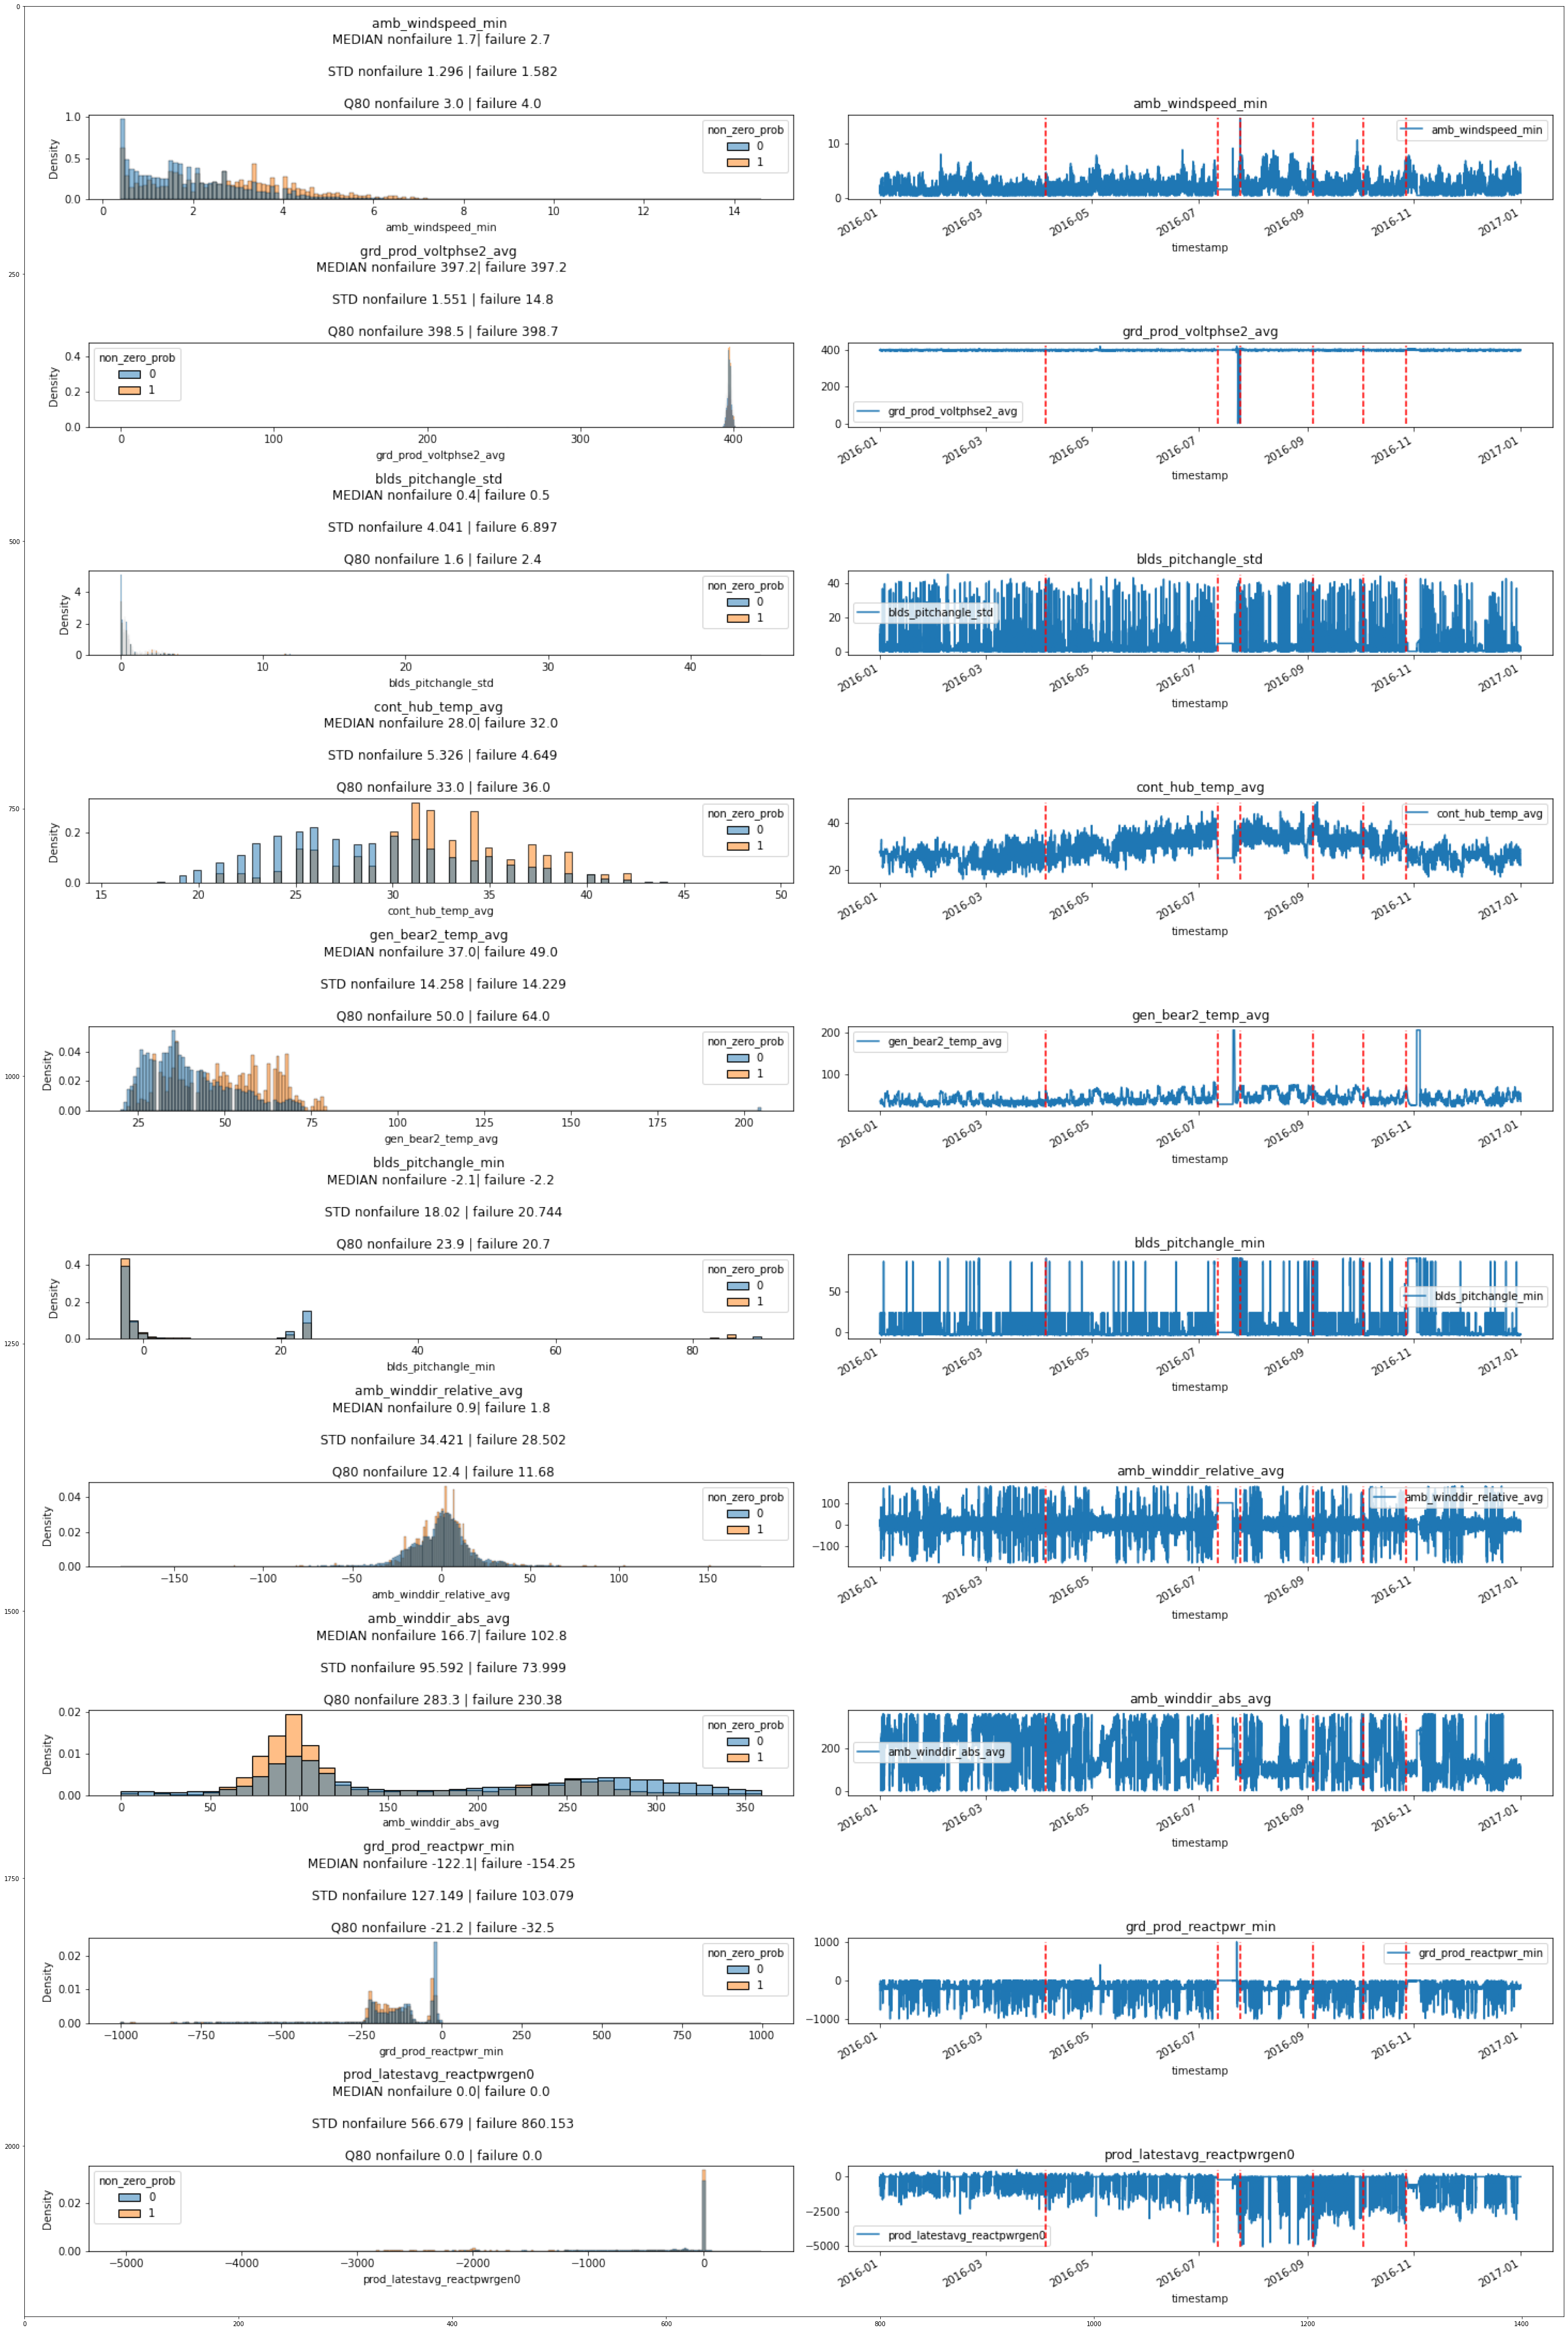

In [44]:

filename = 'histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

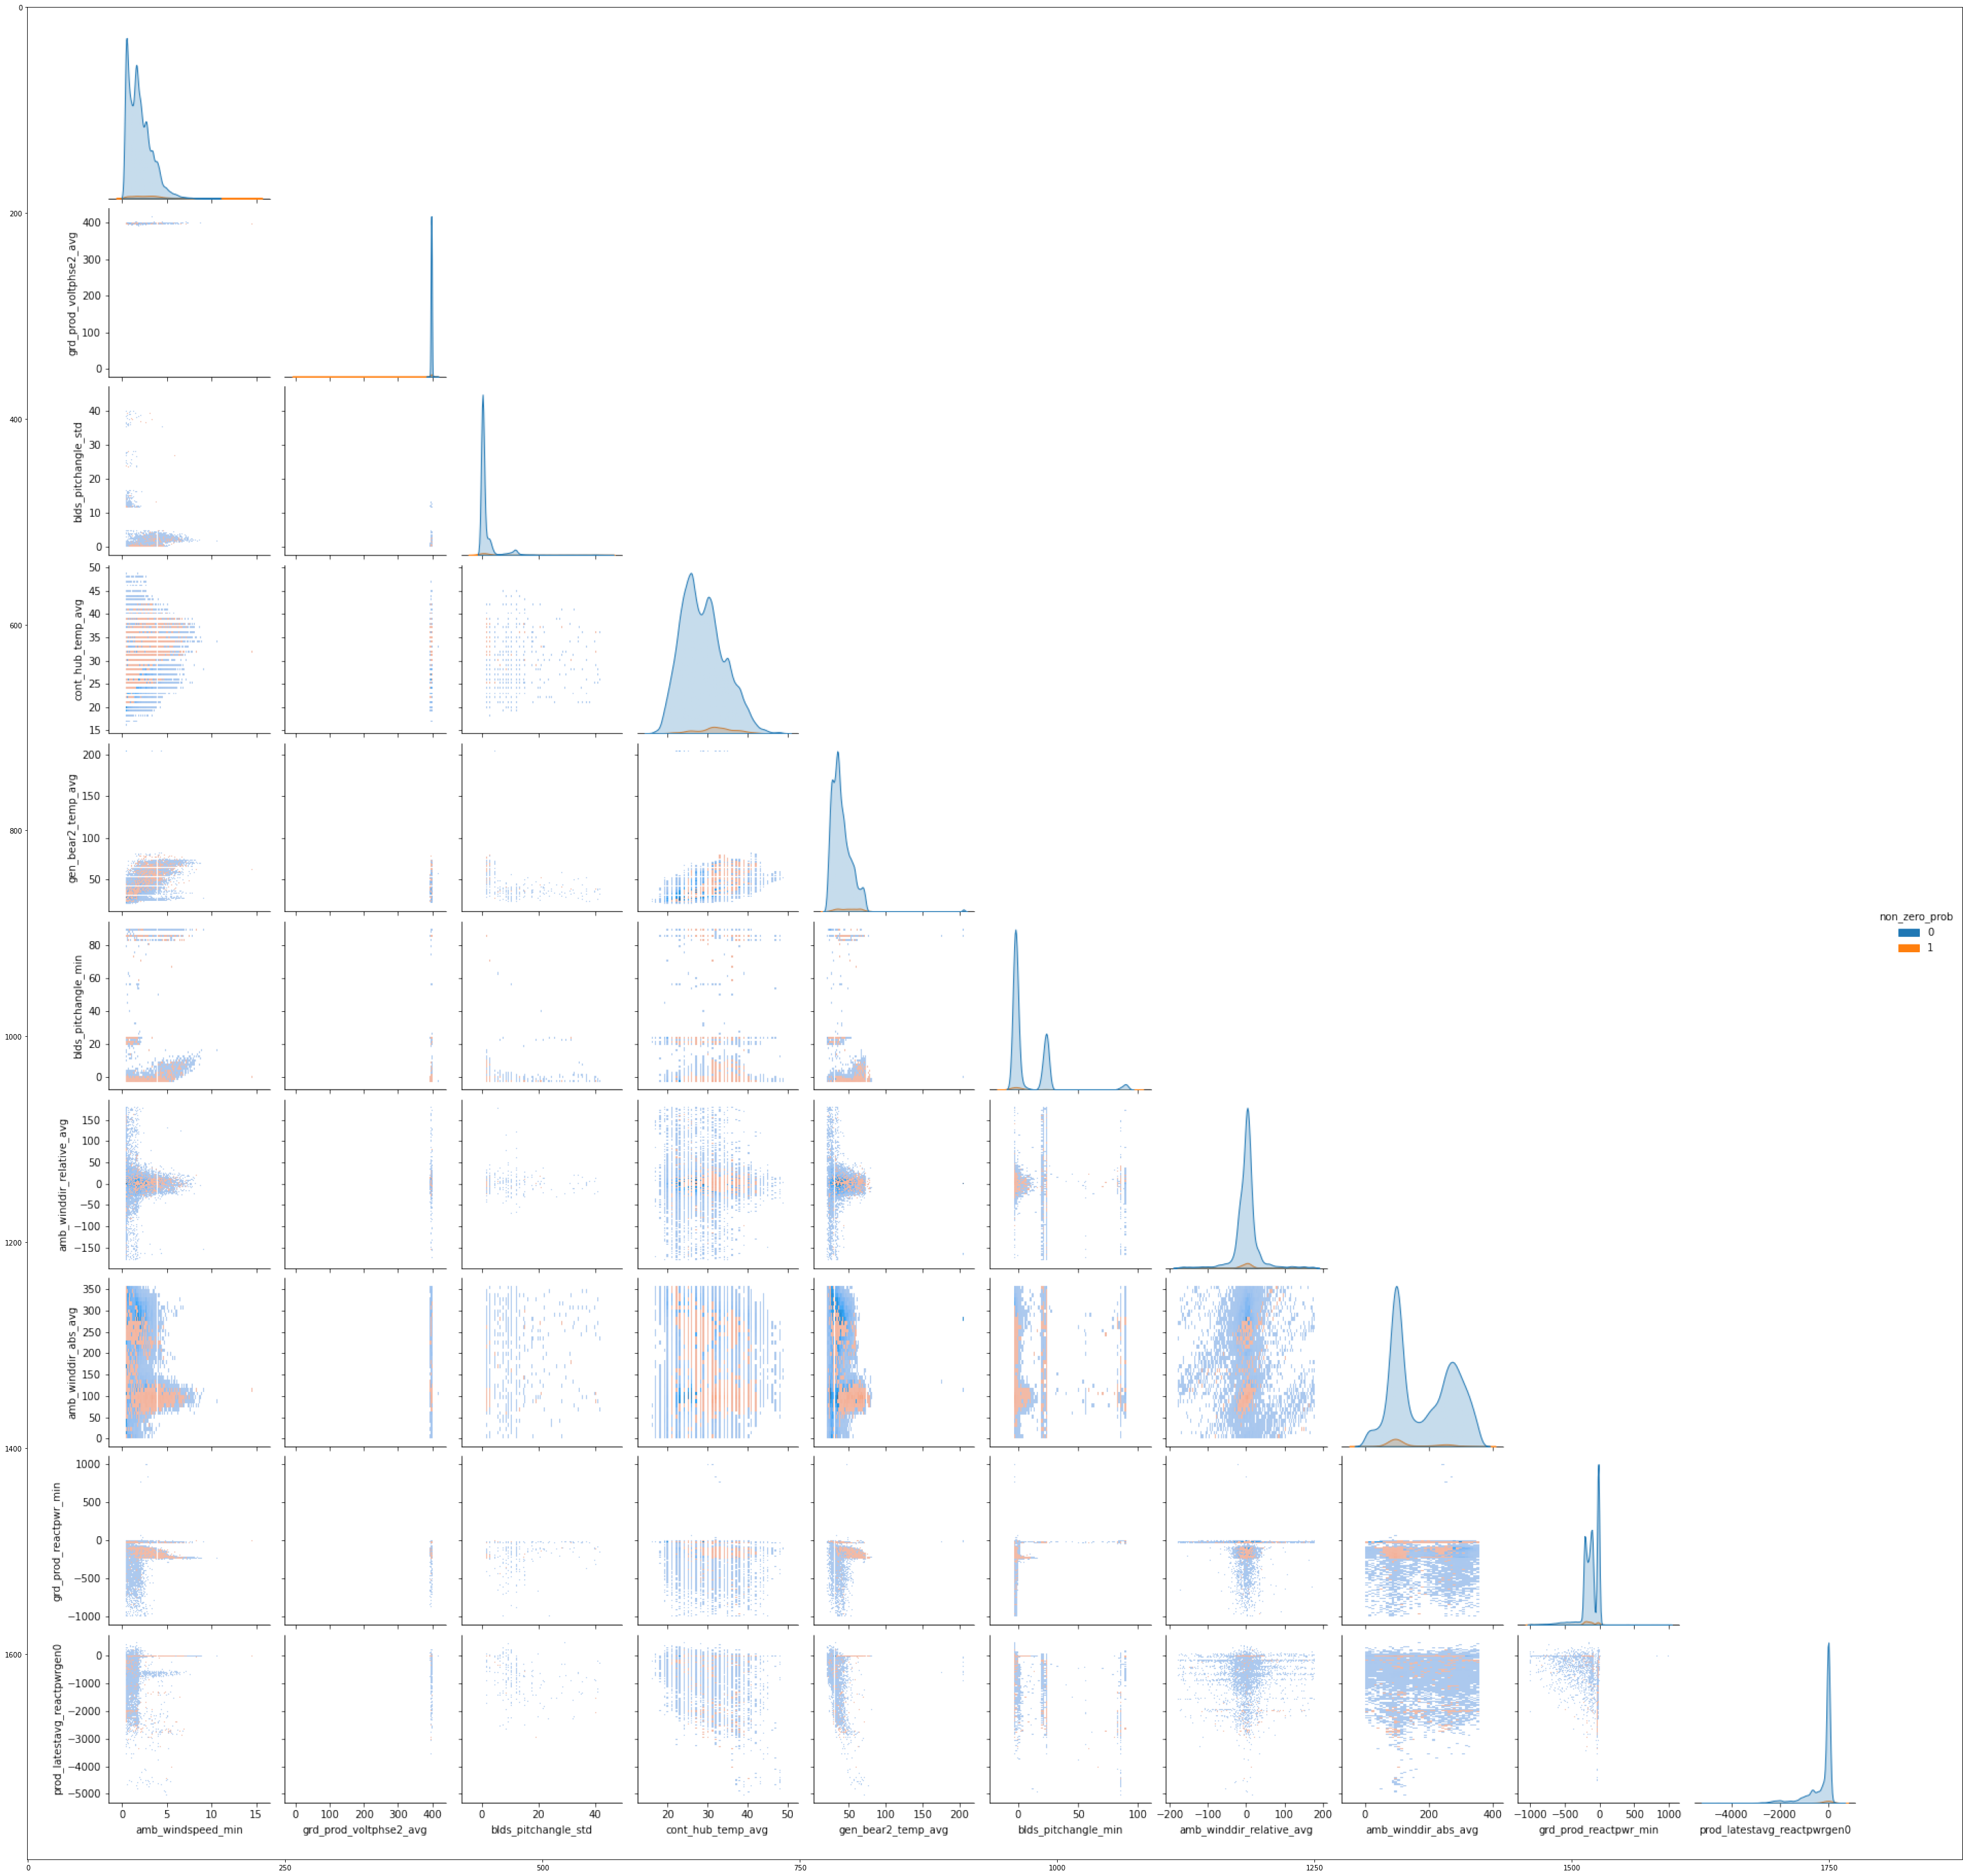

In [45]:

filename = 'float_tags_distribution'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(50,50))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

# Signals of Pre Failure
- low -> amb_windspeed_min 
- high -> blds_pitchangle_avg
- high -> amb_winddir_relative_avg
- high -> grd_prod_psbleind_std
- high -> grd_prod_reactpwr_min

# Validation

In [46]:
test_set = input_prob_failure(df=test_set)
test_set

DONE!


turbine_id  grd_prod_pwr_min  gen_rpm_avg  \
timestamp                                                       
2017-01-01 00:00:00        T06           239.100     1318.600   
2017-01-01 00:10:00        T06           197.300     1310.600   
2017-01-01 00:20:00        T06           199.600     1288.300   
2017-01-01 00:30:00        T06           169.000     1273.500   
2017-01-01 00:40:00        T06           154.300     1259.900   
...                        ...               ...          ...   
2017-08-31 23:20:00        T06           190.700     1284.400   
2017-08-31 23:30:00        T06           123.400     1258.800   
2017-08-31 23:40:00        T06            94.300     1251.300   
2017-08-31 23:50:00        T06            28.000     1249.700   
2017-09-01 00:00:00        T06            37.400     1252.400   

                     blds_pitchangle_max  grd_prod_pwr_avg  \
timestamp                                                    
2017-01-01 00:00:00                0.600           378.100   
2017-01-01 00:10:00               -0.900           343.300   
2017-01-01 00:20:00               -0.800           318.100   
2017-01-01 00:30:00                1.100           275.800   
2017-01-01 00:40:00               -0.400           228.500   
...                                  ...               ...   
2017-08-31 23:20:00               -0.800           315.900   
2017-08-31 23:30:00               -0.300           255.900   
2017-08-31 23:40:00                0.000           211.800   
2017-08-31 23:50:00                0.600           143.500   
2017-09-01 00:00:00                0.600           163.800   

                     amb_winddir_abs_avg  gen_bear_temp_avg  \
timestamp                                                     
2017-01-01 00:00:00              100.900             39.000   
2017-01-01 00:10:00               91.900             39.000   
2017-01-01 00:20:00              101.000             39.000   
2017-01-01 00:30:00              104.800             39.000   
2017-01-01 00:40:00               99.900             39.000   
...                                  ...                ...   
2017-08-31 23:20:00               93.000             47.000   
2017-08-31 23:30:00               89.500             48.000   
2017-08-31 23:40:00               87.400             48.000   
2017-08-31 23:50:00               82.900             49.000   
2017-09-01 00:00:00               87.600             49.000   

                     amb_windspeed_min  grd_prod_reactpwr_max  \
timestamp                                                       
2017-01-01 00:00:00              2.500               -120.900   
2017-01-01 00:10:00              2.400               -109.900   
2017-01-01 00:20:00              2.300               -117.600   
2017-01-01 00:30:00              2.700               -124.900   
2017-01-01 00:40:00              2.000               -104.900   
...                                ...                    ...   
2017-08-31 23:20:00              3.500                -80.900   
2017-08-31 23:30:00              2.900                -15.900   
2017-08-31 23:40:00              2.100                324.800   
2017-08-31 23:50:00              2.700                626.200   
2017-09-01 00:00:00              2.400                -83.900   

                     grd_prod_curphse1_avg  ...  grd_prod_cosphi_avg  \
timestamp                                   ...                        
2017-01-01 00:00:00                322.400  ...                0.900   
2017-01-01 00:10:00                291.300  ...                0.900   
2017-01-01 00:20:00                274.300  ...                0.900   
2017-01-01 00:30:00                245.900  ...                0.900   
2017-01-01 00:40:00                205.600  ...                0.900   
...                                    ...  ...                  ...   
2017-08-31 23:20:00                263.700  ...                1.000   
2017-08-31 23:30:00                217.000  ...      

In [47]:
red_tags_float

['amb_windspeed_min',
 'grd_prod_voltphse2_avg',
 'blds_pitchangle_std',
 'cont_hub_temp_avg',
 'gen_bear2_temp_avg',
 'blds_pitchangle_min',
 'amb_winddir_relative_avg',
 'amb_winddir_abs_avg',
 'grd_prod_reactpwr_min',
 'prod_latestavg_reactpwrgen0']

In [48]:
plot_histogram_per_variable_failure(df=test_set, turbine=turbine, filename='test_histogram_per_variable_failure', tags=red_tags_float)

DONE!


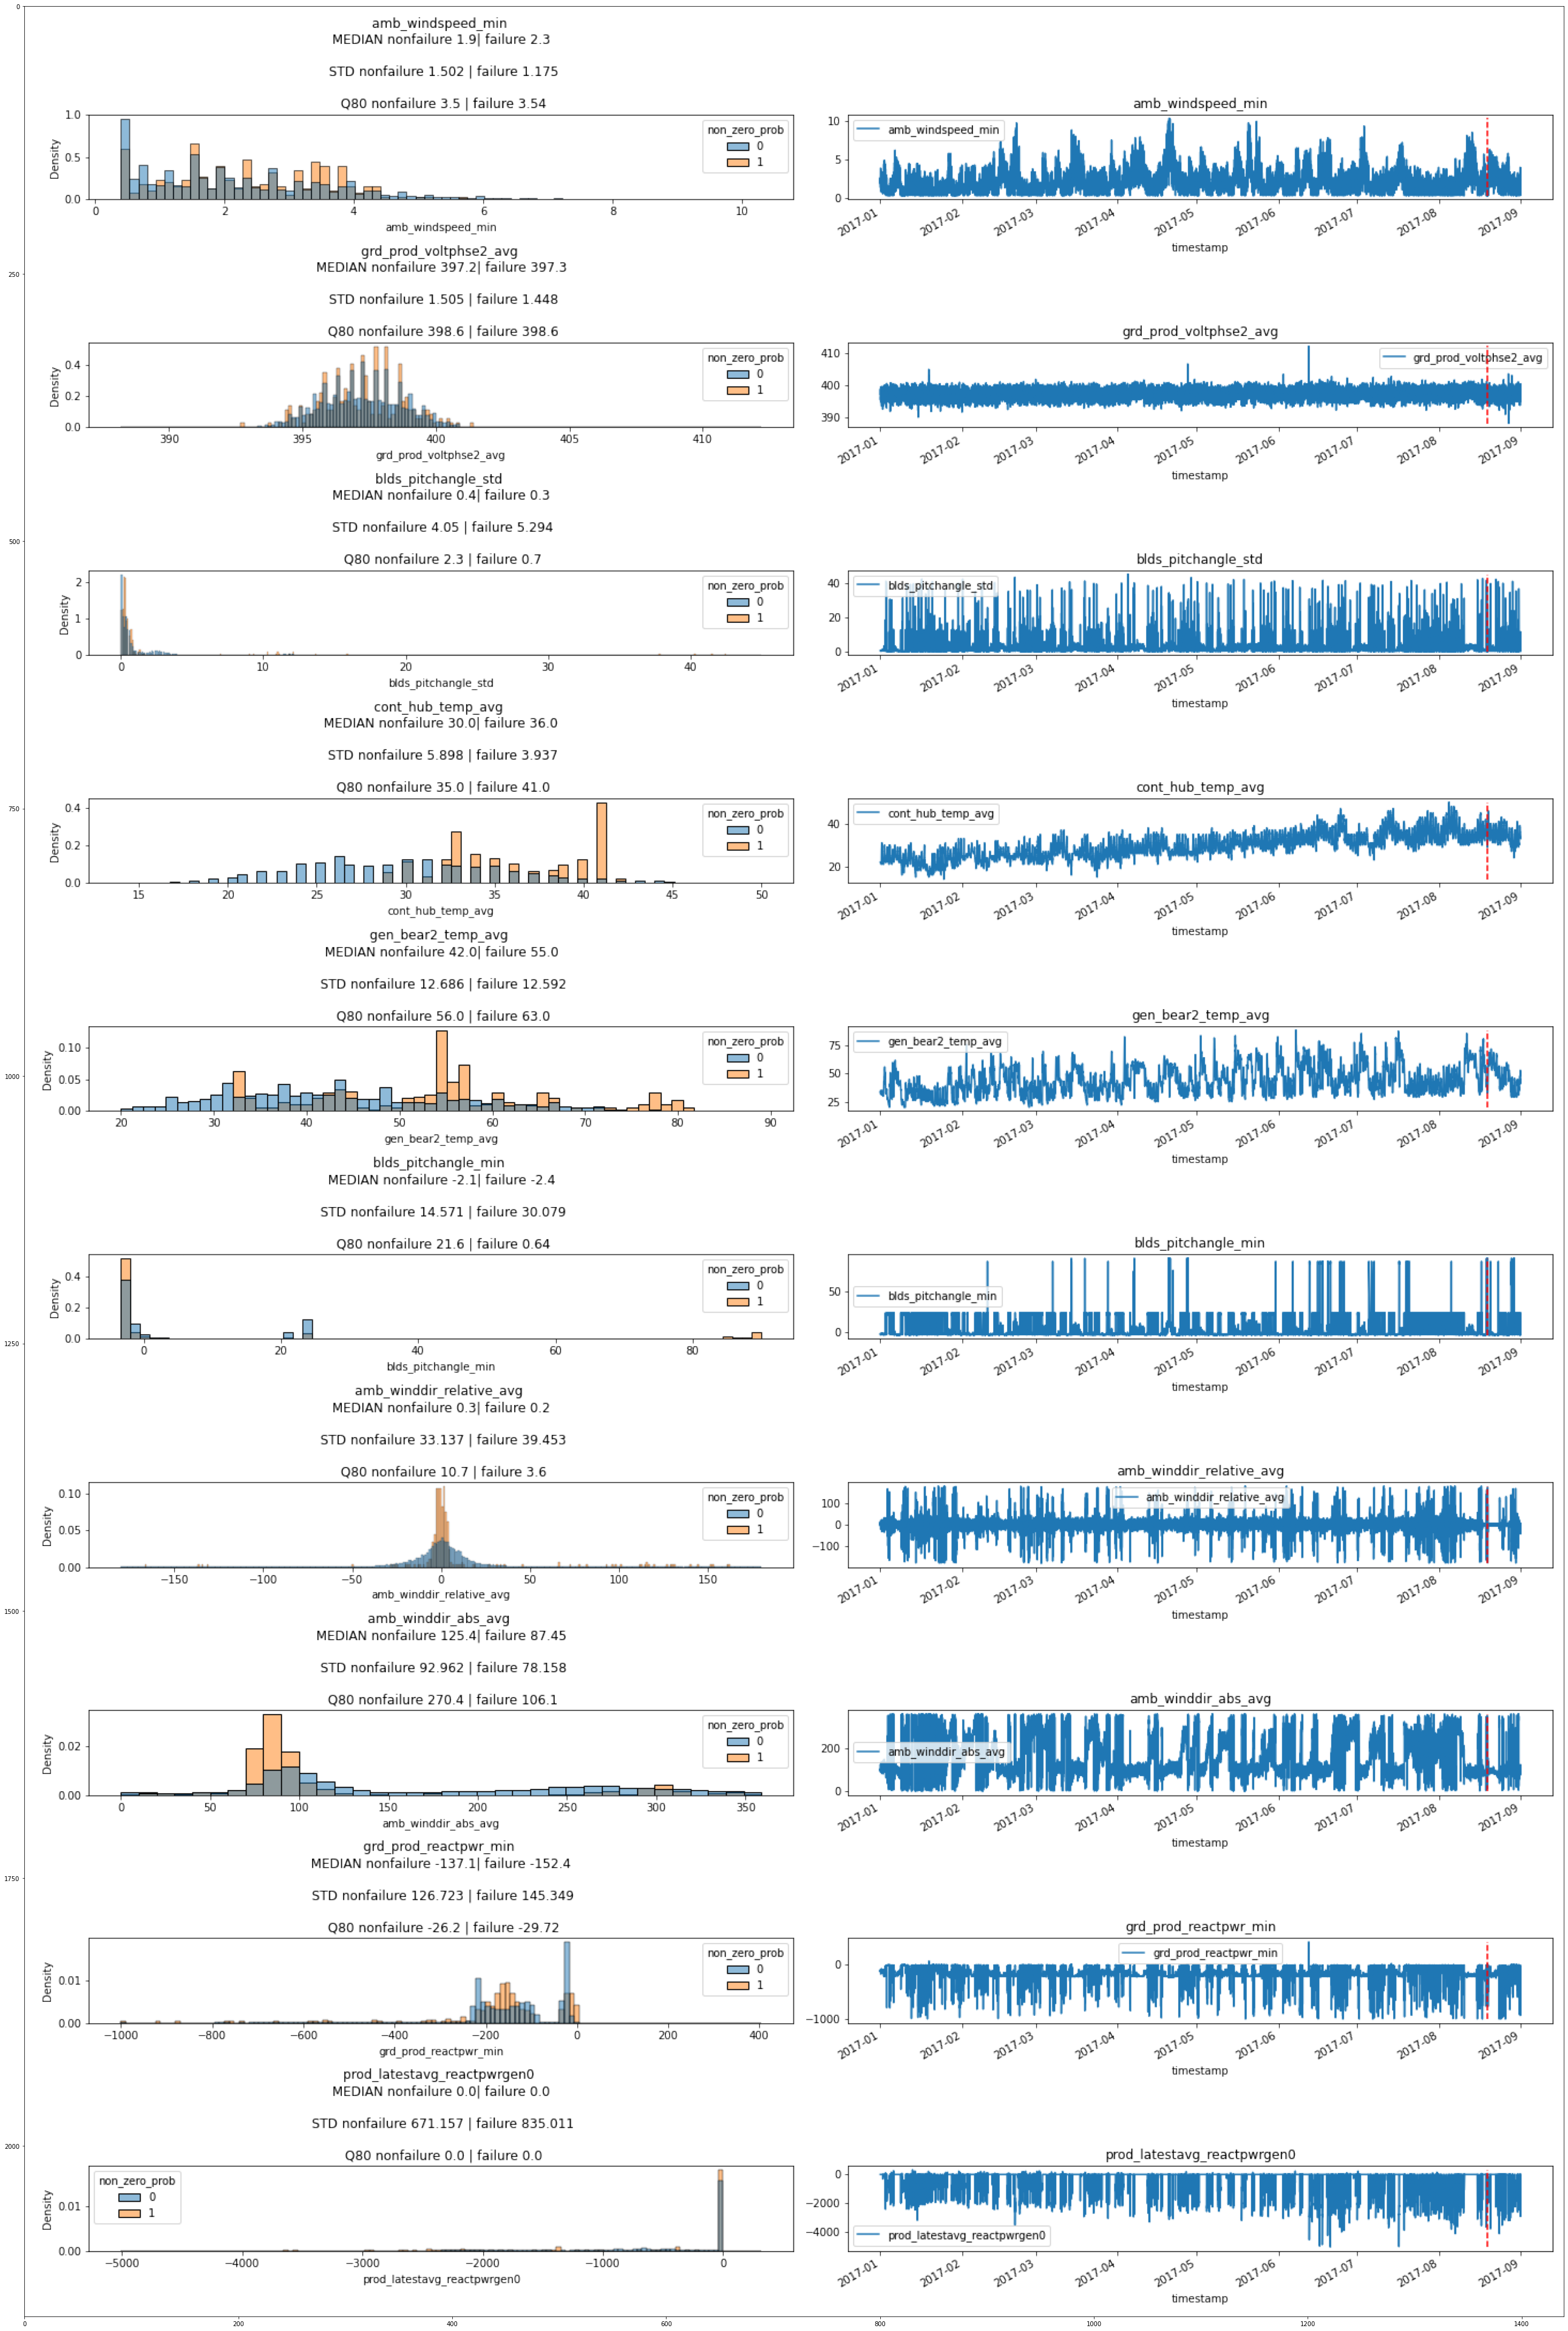

In [49]:

filename = 'test_histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()

In [50]:
    filename = 'compare_histogram_per_variable_failure'

    tags = red_tags_float.copy()
    plt.figure(figsize=(20,3*len(tags)))
    e = 1 

    # for e,tag in enumerate(red_tags_float):
    for tag in tags:

        df = training_set.copy()
        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'TRAINING_SET \n {tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
        
        df = test_set.copy()
        # DISTRIBUTION FAILURE AND NON FAILURE
        tmp = df[[tag,'non_zero_prob']].copy()
        
        q80_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].quantile(0.8).round(3)
        q80_failure= tmp[tmp['non_zero_prob'] != 0][tag].quantile(0.8).round(3)
        median_nonfailure = tmp[tmp['non_zero_prob'] == 0][tag].median().round(3)
        median_failure= tmp[tmp['non_zero_prob'] != 0][tag].median().round(3)
        std_nonfailure= tmp[tmp['non_zero_prob'] == 0][tag].std().round(3)
        std_failure= tmp[tmp['non_zero_prob'] != 0][tag].std().round(3)
        
        txt =f'''\n MEDIAN nonfailure {median_nonfailure}| failure {median_failure} 
            \n STD nonfailure {std_nonfailure} | failure {std_failure}
            \n Q80 nonfailure {q80_nonfailure} | failure {q80_failure}'''
        
        plt.subplot(len(tags),2,e)
        plt.title(f'TEST_SET \n {tag} {txt}')
        sns.histplot(data=tmp, x=tag, hue='non_zero_prob', cumulative=False, stat="density", common_norm=False )
        plt.subplots_adjust(wspace=0.15, hspace=0.3)
        plt.tight_layout()
        e += 1
                
    # plt.show()
    plt.savefig(f'../output_EDA/{turbine}/figures/{filename}.png')
    plt.close()
    print('DONE!')

DONE!


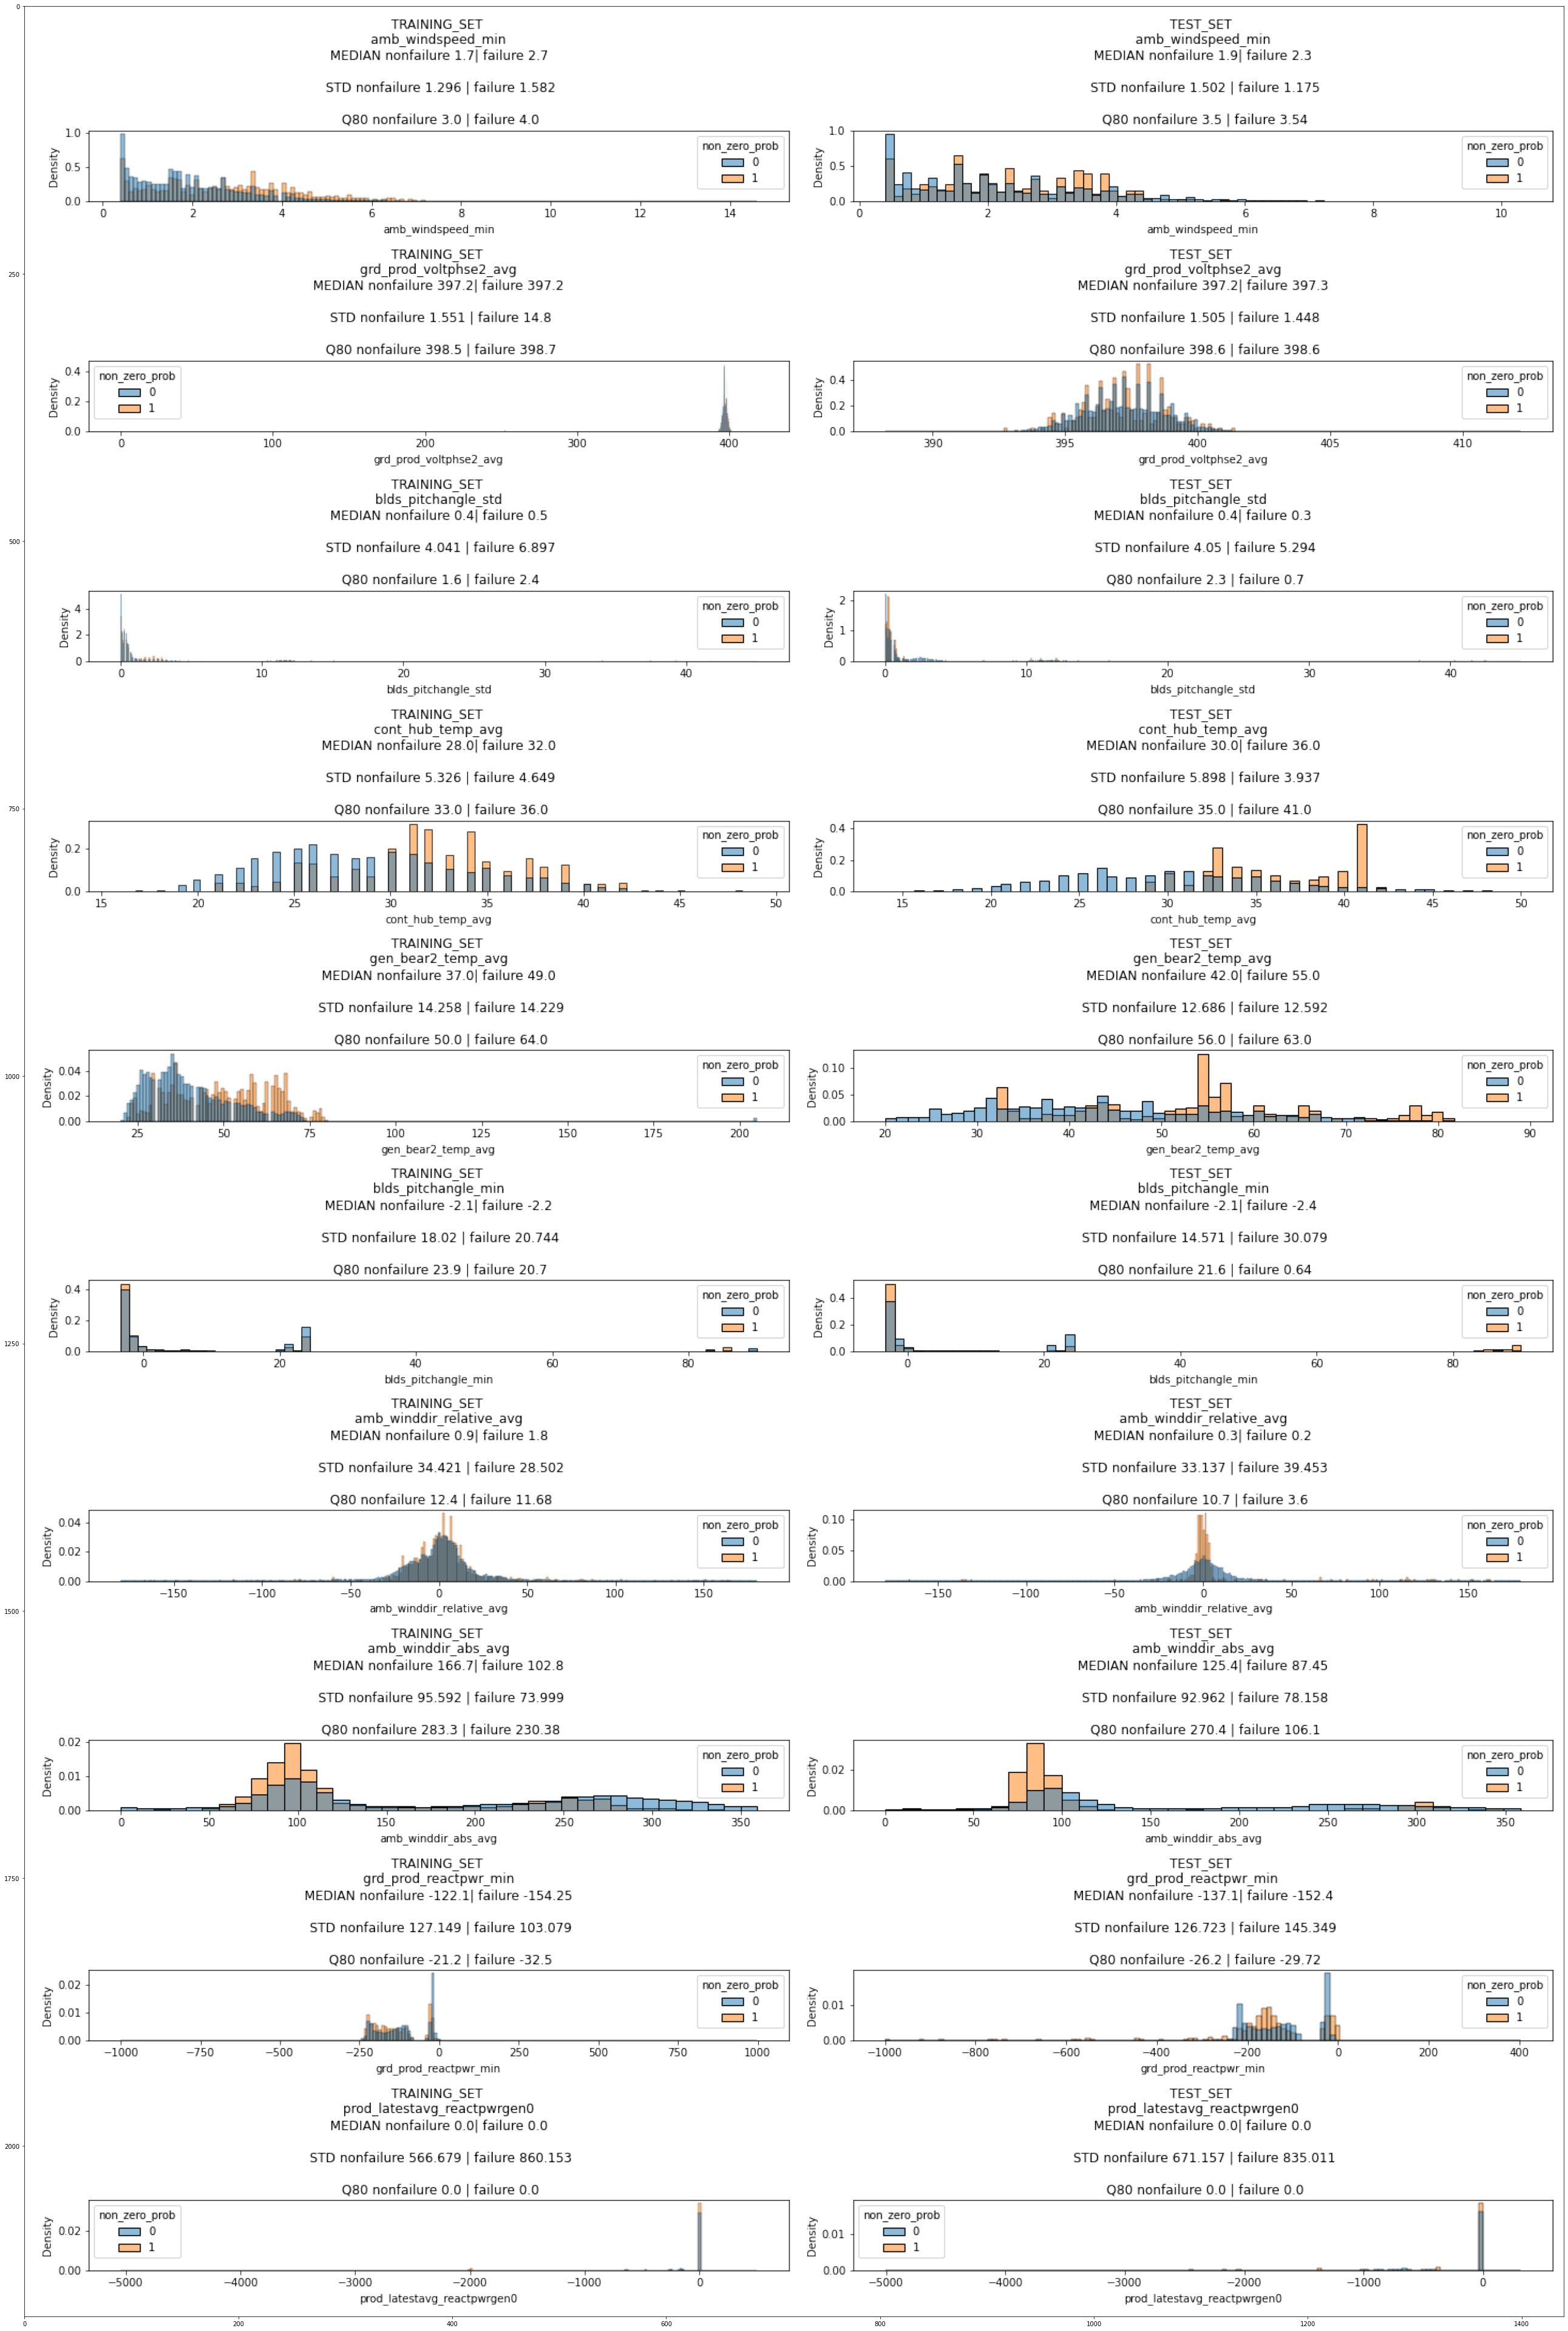

In [51]:

filename = 'compare_histogram_per_variable_failure'
filepath = f'../output_EDA/{turbine}/figures/{filename}.png'

plt.figure(figsize=(70,70))
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.show()